<a href="https://colab.research.google.com/github/raul-miranda/DS-201-Project-1/blob/main/D201_Project_2_raul4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stroke Predictions**
---
Ana Ortez-Rivera, Olga Tolchinsky, Rongjia Zhang, Raul Miranda

Data Science 201 - Spring 2021
Project 2
April 29, 2021

Source of dataset: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

## **1. Introduction**


Background on medical studies

The features of the data are as follows:

*   id: unique identifier - numerical
*   gender: "Male", "Female" or "Other" - categorical
*   age: age of the patient - numerical
*   hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension - categorical
*   heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease - categorical
*   ever_married: "No" or "Yes" - categorical
*   work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" - categorical
*   Residence_type: "Rural" or "Urban" - categorical
*   avg_glucose_level: average glucose level in blood - continuous
*   bmi: body mass index - continuous
*   smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown" - categorical
*   stroke: 1 if the patient had a stroke or 0 if not - categorical

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient




## **2. Data Wrangling**

### 2a. Loading the Data

In [231]:
# Importing packages
import pandas as pd
import numpy as np
from google.colab import files

In [232]:
# Uploading Json file with token key (USERNAME, KEY)
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


In [233]:
# Loading csv into dateframe
df_health = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [234]:
# Viewing data

df_health[:10]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [235]:
# Checking data types of dataframe
print (df_health.shape)
print (df_health.dtypes)

(5110, 12)
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [236]:
# Drop  "id" column; unnecessary for prediction
df_health.drop('id', inplace=True, axis=1)

In [237]:
# Descriptive statistics of numerical variables
df_health.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [238]:
# Checking the NAs in the dataset
df_health.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [239]:
# Replace NaN with mean value of bmi to avoid changing the column mean - create copy to preserve original df_health dataset
df_health_2 = pd.DataFrame(df_health).copy()
df_health_2['bmi'] = df_health_2['bmi'].fillna(df_health_2['bmi'].mean())
df_health_2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [240]:
# Viewing remaining nulls
df_health_2.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [241]:
# Replace 'Unknown'  'smoking_status' to the most common value for the same gender, work_type and residence_type groups
print (df_health_2['smoking_status'].value_counts())  # before changing
df_health_2['smoking_status'] = df_health_2['smoking_status'].replace('Unknown', np.nan)   # replace unknown with NaN
df_health_2['smoking_status'] = df_health_2.groupby(['gender','work_type','Residence_type'], 
    sort=False).smoking_status.apply(lambda x: x.fillna(x.mode().iloc[0]))    # replace  NaN with most common for group 
print (df_health_2['smoking_status'].value_counts())  # after changing
print (df_health_2['smoking_status'].isna().sum())    # check for NaN

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
never smoked       3402
formerly smoked     919
smokes              789
Name: smoking_status, dtype: int64
0


## **3. Exploratory Data Analysis (EDA)**


In [242]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

### 3a. Histograms


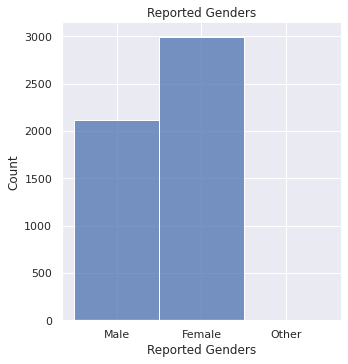

In [243]:
# Graph of genders reported
sns.set_theme(style="darkgrid")
sns.displot(df_health_2['gender'])
plt.xlabel('Reported Genders')
plt.ylabel('Count')
plt.title('Reported Genders')
plt.show()

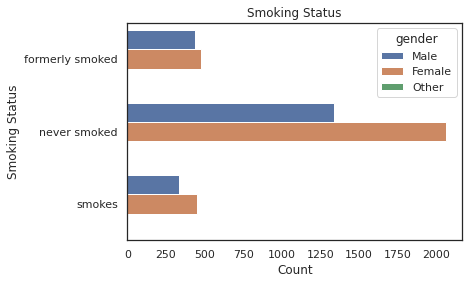

In [244]:
# Graph of smoking status and gender
sns.set_theme(style="white")
sns.countplot(y='smoking_status', hue = 'gender', data=df_health_2)
plt.xlabel('Count')
plt.ylabel('Smoking Status')
plt.title('Smoking Status')
plt.show()

In [245]:
# Graph of age with stroke

### 3b. Barplot

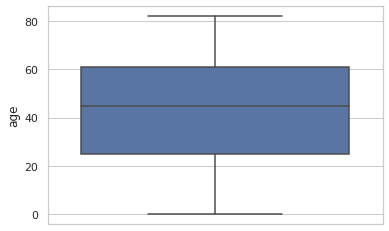

In [246]:
# Graph of ages
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=df_health_2["age"])

### 3c. Scatterplots

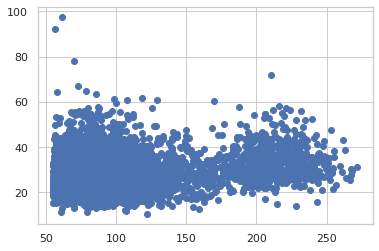

In [247]:
# Viewing average glucose level against bmi
plt.scatter(df_health_2['avg_glucose_level'], df_health_2['bmi'])    

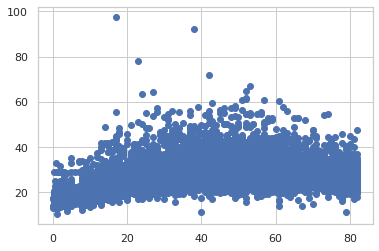

In [248]:
# Viewing bmi against age
plt.scatter(df_health_2['age'], df_health_2['bmi']) 

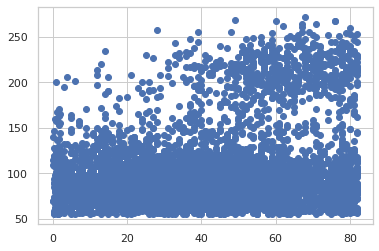

In [249]:
# Viewing Avg Glucose Level against age
plt.scatter(df_health_2['age'], df_health_2['avg_glucose_level'])

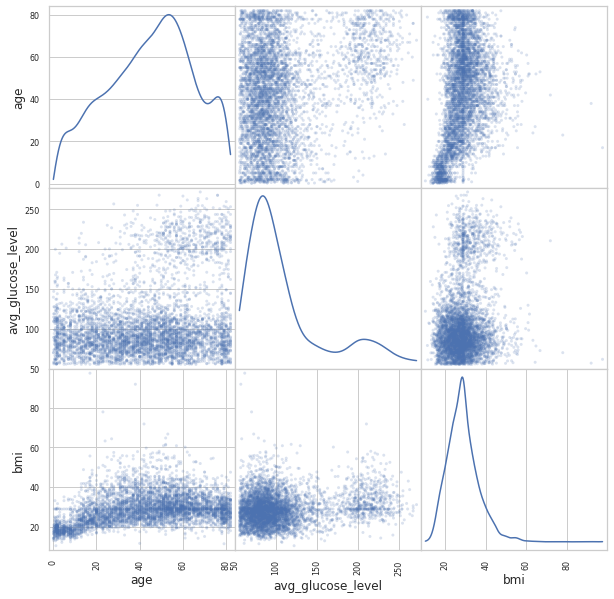

In [250]:
# Correlations between age, glucose level and bmi
scatter_matrix(df_health_2[['age','avg_glucose_level','bmi']], alpha=0.2, figsize=(10,10), diagonal="kde");

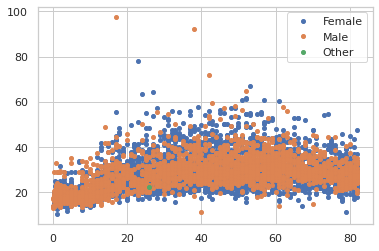

In [251]:
# Viewing the distribution of males and females against age
groups = df_health_2.groupby('gender')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.age, group.bmi, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show()

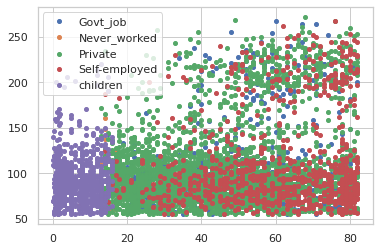

In [252]:

# Viewing distribution of work type (incl children) against age
groups = df_health_2.groupby ('work_type')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.age, group.avg_glucose_level, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show()

### 3d. Density Plot

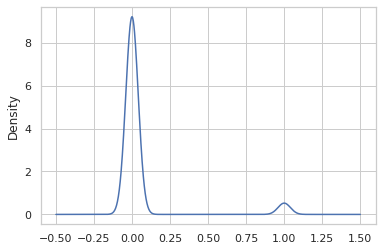

In [253]:
# Graph of hypertension       
df_health_2.heart_disease.plot.kde()

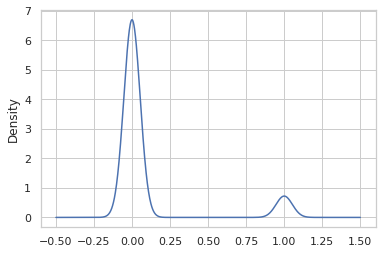

In [254]:
df_health_2.hypertension.plot.kde()

In [ ]:
# Graph of amount of strokes

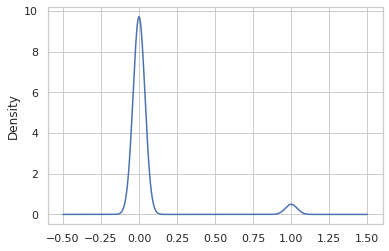

In [255]:
df_health_2.stroke.plot.kde()

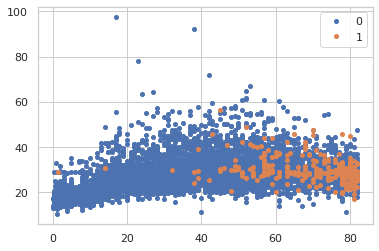

In [256]:
# Graph of strokes with age
groups = df_health_2.groupby('stroke')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.age, group.bmi, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show()

In [ ]:
# Graph of strokes with gender

In [ ]:
# Graph of strokes with BMI

In [ ]:
# Graph of stroke with smoking status

In [ ]:
# Graph of stroke with glucose level

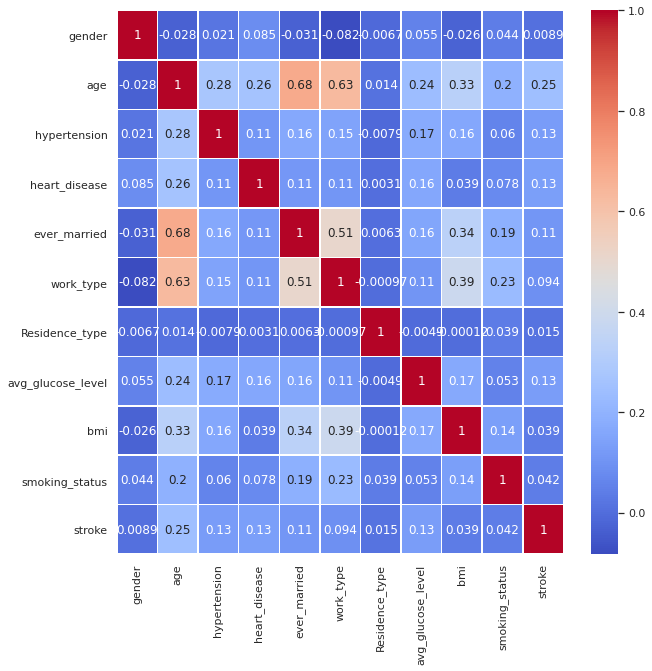

In [257]:
# Correlation Heatmap
import seaborn as sns
Z = df_health_2.copy()
Z['gender'] = Z['gender'].map({'Male':1, 'Female':0, 'Other':2})
Z['ever_married'] = Z['ever_married'].map({'Yes':1, 'No':0})
Z['work_type'] = Z['work_type'].map({'Private':3, 'Self-employed':4, 'Govt_job':2, 'children':0, 'Never_worked':1})
Z['Residence_type'] = Z['Residence_type'].map({'Urban':1, 'Rural':0})
Z['smoking_status'] = Z['smoking_status'].map({'formerly smoked':1, 'never smoked':0, 'smokes':2})

fig, ax = plt.subplots (figsize=(10,10))
sns.heatmap(Z.corr(), cmap='coolwarm', annot=True, linewidths=.5)

## **4. Modeling**

In [212]:
# Import packages

# Mathplotlib
from matplotlib import pyplot as plt
# XGBoost
import xgboost as xgb
from xgboost import plot_importance
# Sklean
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
from sklearn import tree

%matplotlib inline



###4a. Linear Regression (Olga)

In [258]:
X = df_health_2.drop(['bmi', 'stroke'], axis=1)
X.shape

(5110, 9)

In [259]:
y = df_health_2['bmi']
y.shape

(5110,)

In [260]:
type(X)

pandas.core.frame.DataFrame

In [261]:
X['gender'] = X['gender'].map({'Male':1, 'Female':0, 'Other':2})
X['ever_married'] = X['ever_married'].map({'Yes':1, 'No':0})
X['work_type'] = X['work_type'].map({'Private':3, 'Self-employed':4, 'Govt_job':2, 'children':0, 'Never_worked':1})
X['Residence_type'] = X['Residence_type'].map({'Urban':1, 'Rural':0})
X['smoking_status'] = X['smoking_status'].map({'formerly smoked':1, 'never smoked':0, 'smokes':2})
X.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
dtype: int64

In [262]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

In [263]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

In [264]:
X_train.shape, y_train.shape

((3577, 9), (3577,))

In [265]:
X_test.shape, y_test.shape

((1533, 9), (1533,))

In [266]:
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [267]:
y_predicted = LinReg.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true = y_test, y_pred = LinReg.predict(X_test)))

51.605109384869166


In [268]:
print(mean_squared_error(y_true = y_train, y_pred = LinReg.predict(X_train)))

48.87259170399324


In [269]:
LinReg.score(X_test, y_test)

0.22189475412931683

In [270]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_true = y_test, y_pred = LinReg.predict(X_test)))

5.055043907734956


(array([  1.,  27., 249., 580., 366., 169.,  87.,  27.,  17.,  10.]),
 array([-20.3196244 , -15.33941695, -10.3592095 ,  -5.37900205,
         -0.3987946 ,   4.58141285,   9.56162031,  14.54182776,
         19.52203521,  24.50224266,  29.48245011]),
 <a list of 10 Patch objects>)

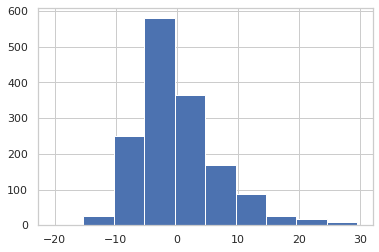

In [271]:
import matplotlib.pyplot as plt
plt.hist(y_test - y_predicted)

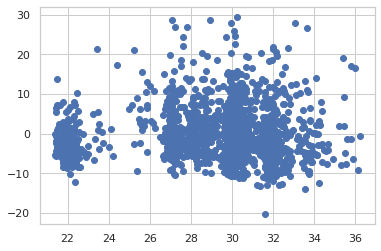

In [272]:
plt.scatter(y_predicted, y_test - y_predicted)

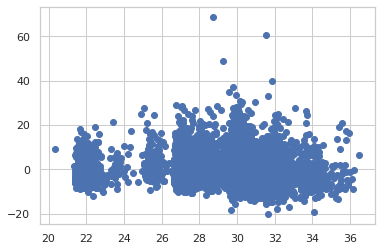

In [273]:
plt.scatter(LinReg.predict(X), y - LinReg.predict(X))

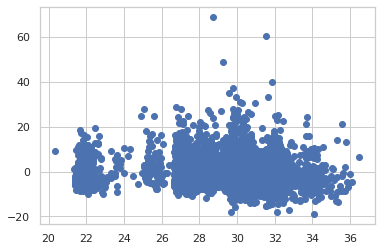

In [274]:
plt.scatter(LinReg.predict(X_train), y_train - LinReg.predict(X_train))

In [275]:
print(X_test.columns)    #   variables
print(LinReg.coef_)      #  regression coefficients for each of the variables

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status'],
      dtype='object')
[ 6.40791718e-02  9.50642994e-04  1.91597441e+00 -1.18443592e+00
  2.87399230e+00  1.74257819e+00 -3.86039269e-02  1.47017345e-02
  2.49089994e-01]


In [276]:
print(LinReg.intercept_)    #  intercept value of bmi

20.576944391398662


###4b. Logistic Regression (Ana)


In [277]:
X = df_health_2.drop('stroke', axis=1)
y = df_health_2['stroke']
X_columns = X.columns     # save the column names to restore them when needed

X['gender'] = X['gender'].map({'Male':1, 'Female':0, 'Other':2})
X['ever_married'] = X['ever_married'].map({'Yes':1, 'No':0})
X['work_type'] = X['work_type'].map({'Private':3, 'Self-employed':4, 'Govt_job':2, 'children':0, 'Never_worked':1})
X['Residence_type'] = X['Residence_type'].map({'Urban':1, 'Rural':0})
X['smoking_status'] = X['smoking_status'].map({'formerly smoked':1, 'never smoked':0, 'smokes':2})

In [278]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25,random_state=0)
print(X_train.shape , X_test.shape)

(3832, 10) (1278, 10)


In [279]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smt = SMOTE (random_state=1, ratio='minority')
print ("Before SMOTE: ", Counter(y_train))   
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)
print ("After SMOTE: ", Counter(y_train_SMOTE))
print ("X_train shape: ", X_train_SMOTE.shape)
print ("y_train shape: ", y_train_SMOTE.shape)
print ("X_test shape: ", X_test.shape)
print ("y_test shape: ", y_test.shape)


Before SMOTE:  Counter({0: 3648, 1: 184})
After SMOTE:  Counter({0: 3648, 1: 3648})
X_train shape:  (7296, 10)
y_train shape:  (7296,)
X_test shape:  (1278, 10)
y_test shape:  (1278,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [280]:
LogReg = LogisticRegression()
scaler = preprocessing.StandardScaler()
X_train_SMOTE = scaler.fit_transform(X_train_SMOTE)
X_test = scaler.transform(X_test)
LogReg.fit(X_train_SMOTE,y_train_SMOTE)
y_pred=LogReg.predict(X_test)

In [281]:
print("\n\nAccuracy:",metrics.accuracy_score(y_test, y_pred))     
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))



Accuracy: 0.7613458528951487
Precision: 0.13855421686746988
Recall: 0.7076923076923077


In [282]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1]
Intercept [-0.24157658]
Coefficients [[-0.00797076  1.94143781  0.09421177  0.20874706  0.0066962  -0.12584779
   0.10505216  0.15453162 -0.06007683  0.15617927]]


In [283]:
print(classification_report(y_test, LogReg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1213
           1       0.14      0.71      0.23        65

    accuracy                           0.76      1278
   macro avg       0.56      0.74      0.55      1278
weighted avg       0.94      0.76      0.83      1278



In [284]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[927, 286],
       [ 19,  46]])

Text(0.5, 257.44, 'Predicted label')

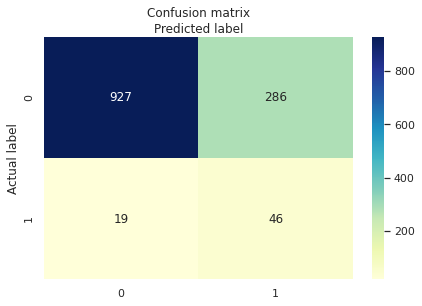

In [285]:
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

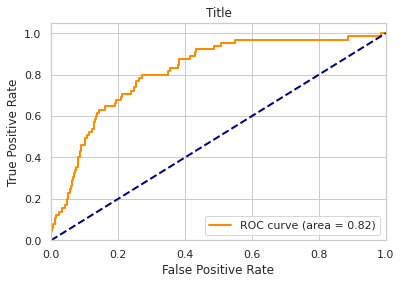

In [286]:
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
        lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Title')
plt.legend(loc="lower right")
plt.show()

### 4c. Decision Tree (Raul)

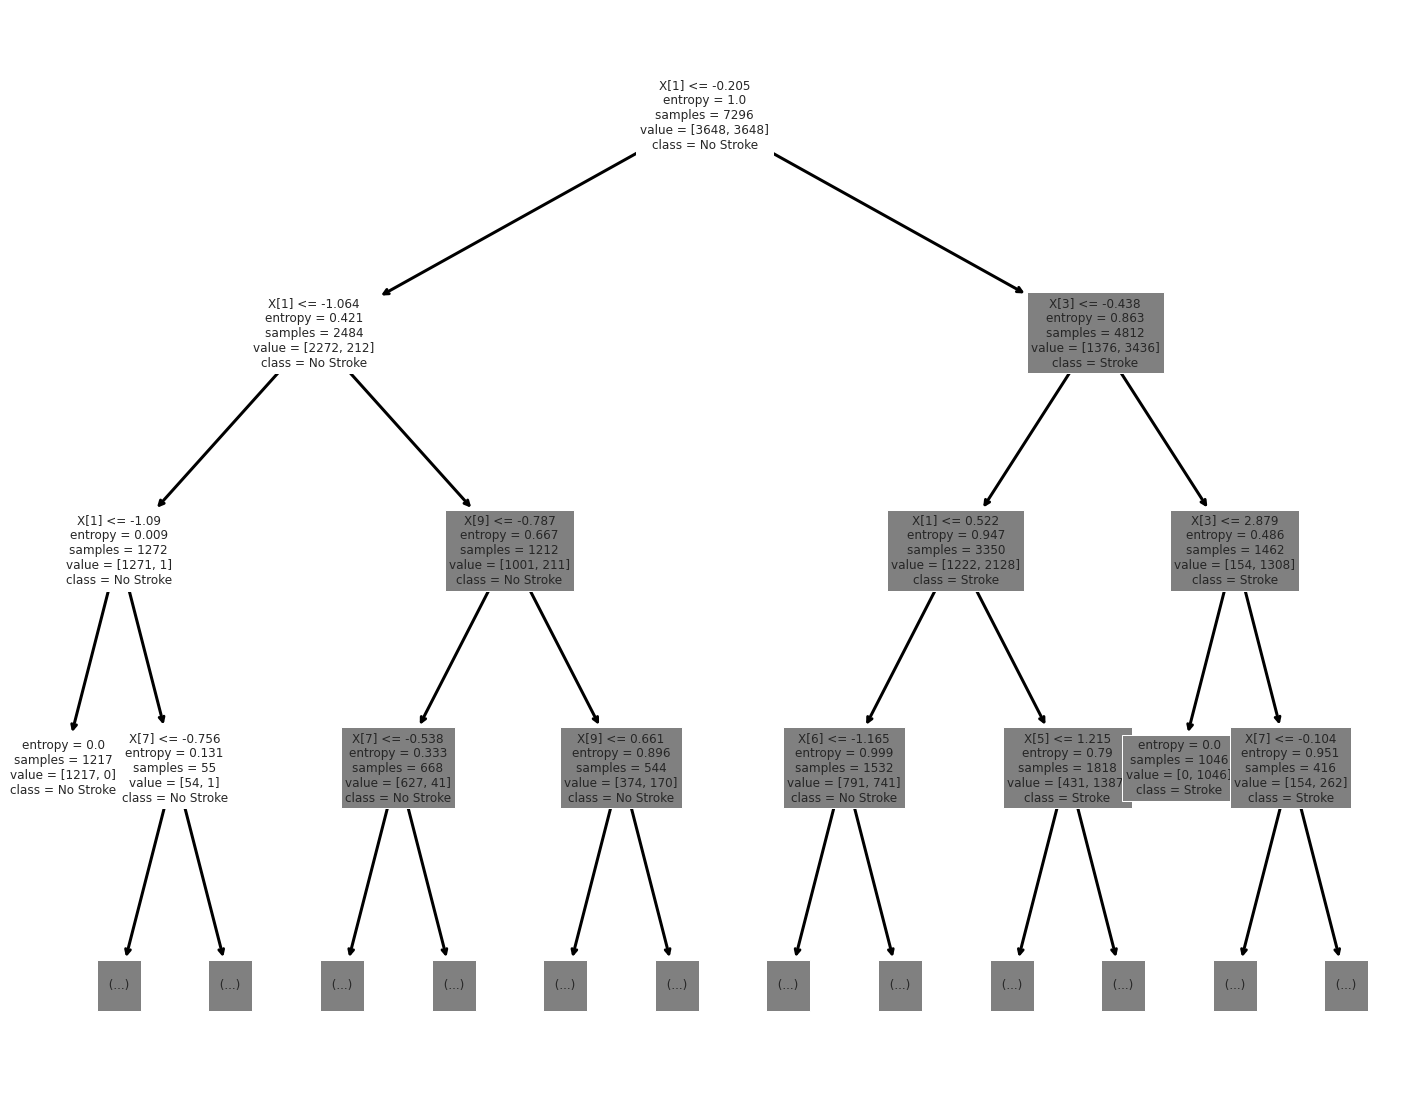

In [295]:
dt_cl = DecisionTreeClassifier(criterion= 'entropy', max_depth=8, random_state=1)
model = dt_cl.fit(X_train_SMOTE,y_train_SMOTE)

# plot tree
from sklearn import tree
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(25,20))
out = tree.plot_tree(decision_tree=model, max_depth=3, fontsize=12, class_names=['No Stroke','Stroke'])
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth('3')
plt.show()


Accuracy: 0.8897
Feature:  gender              Score:  0.01847
Feature:  age                 Score:  0.45489
Feature:  hypertension        Score:  0.00801
Feature:  heart_disease       Score:  0.10359
Feature:  ever_married        Score:  0.00367
Feature:  work_type           Score:  0.07696
Feature:  Residence_type      Score:  0.12086
Feature:  avg_glucose_level   Score:  0.03739
Feature:  bmi                 Score:  0.02603
Feature:  smoking_status      Score:  0.15012


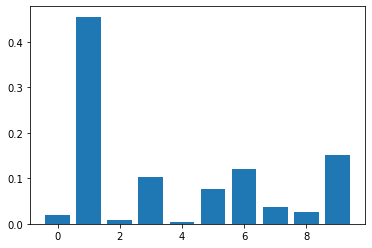

Log loss:  0.817710076478635
Model score based on losses:  4.378599532067652


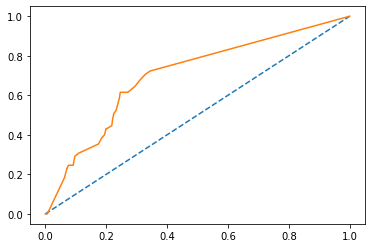

AUC =  0.7004375673790348
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1213
           1       0.15      0.25      0.18        65

    accuracy                           0.89      1278
   macro avg       0.55      0.59      0.56      1278
weighted avg       0.92      0.89      0.90      1278



Text(0.5, 15.0, 'Predicted label')

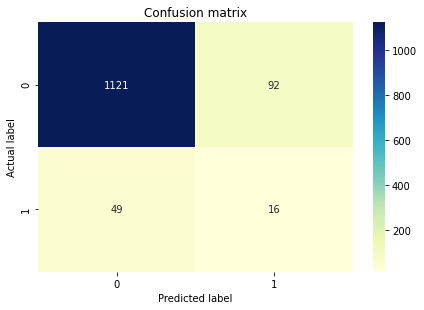

In [226]:
# Run the classification and calculate performance statistics
y_pred = model.predict(X_test)
print ("Accuracy: %.4f" % (accuracy_score(y_test, y_pred)))
importance = model.feature_importances_
for i,v in enumerate(importance):
  print('{:<10}{:<20}{:<8}{:.5f}'.format('Feature:',X_columns[i],'Score:',v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

probas = model.predict_proba(X_test)

probs = probas[:,1]

print ('Log loss: ', log_loss(y_test,probs))

losses = [log_loss(y_test, [yy for x in range(len(y_test))]) for yy in y_pred]
print ('Model score based on losses: ', np.mean(losses))
#plt.plot(y_pred, losses)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()
auc = roc_auc_score(y_test, probs)
print ('AUC = ', auc)

print(classification_report(y_test, y_pred, target_names=['0','1']))

conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Accuracy: 0.8435
Feature:  gender              Score:  0.64260
Feature:  age                 Score:  0.35740


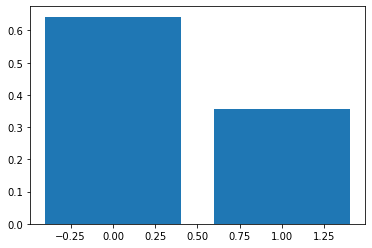

Log loss:  0.43543046213157416
Model score based on losses:  6.442157518987516


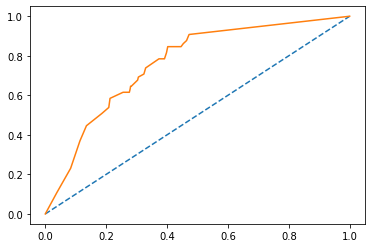

AUC =  0.7602194178451391
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1213
           1       0.15      0.45      0.22        65

    accuracy                           0.84      1278
   macro avg       0.56      0.66      0.57      1278
weighted avg       0.93      0.84      0.88      1278



Text(0.5, 15.0, 'Predicted label')

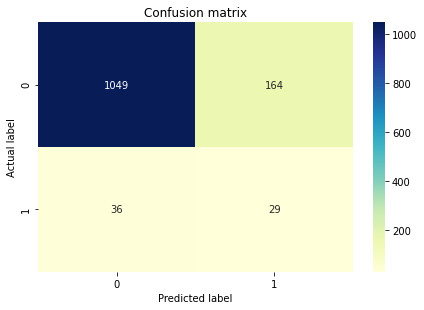

In [228]:
#  Based on previous importance scores, drop every column except 'age' and 'smoking_status' and retry

X_train_reduced = X_train_SMOTE.filter(['age','smoking_status'])
X_test_reduced = X_test.filter(['age','smoking_status'])


dt_cl = DecisionTreeClassifier(criterion= 'entropy', max_depth=8, random_state=1)
model = dt_cl.fit(X_train_reduced,y_train_SMOTE)
y_pred = model.predict(X_test_reduced)
print ("Accuracy: %.4f" % (accuracy_score(y_test, y_pred)))

importance = model.feature_importances_
for i,v in enumerate(importance):
  print('{:<10}{:<20}{:<8}{:.5f}'.format('Feature:',X_columns[i],'Score:',v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

probas = model.predict_proba(X_test_reduced)

probs = probas[:,1]

print ('Log loss: ', log_loss(y_test,probs))

losses = [log_loss(y_test, [yy for x in range(len(y_test))]) for yy in y_pred]
print ('Model score based on losses: ', np.mean(losses))
#plt.plot(y_pred, losses)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()
auc = roc_auc_score(y_test, probs)
print ('AUC = ', auc)

print(classification_report(y_test, y_pred, target_names=['0','1']))

conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Accuracy: 0.9460
Feature:  gender              Score:  0.05551
Feature:  age                 Score:  0.28808
Feature:  hypertension        Score:  0.07371
Feature:  heart_disease       Score:  0.07630
Feature:  ever_married        Score:  0.07264
Feature:  work_type           Score:  0.07844
Feature:  Residence_type      Score:  0.08364
Feature:  avg_glucose_level   Score:  0.07977
Feature:  bmi                 Score:  0.05891
Feature:  smoking_status      Score:  0.13300


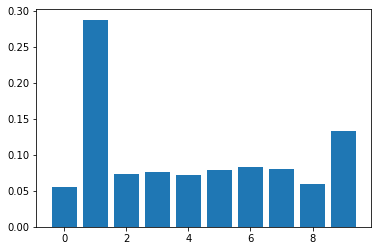

Log loss:  0.3294029023807152
Model score based on losses:  6.442157518987516


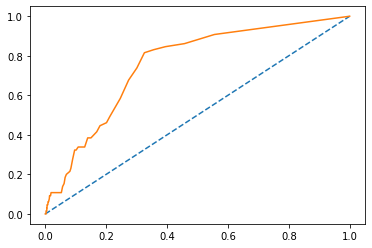

AUC =  0.7555964233622932
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1213
           1       0.15      0.45      0.22        65

    accuracy                           0.84      1278
   macro avg       0.56      0.66      0.57      1278
weighted avg       0.93      0.84      0.88      1278



Text(0.5, 15.0, 'Predicted label')

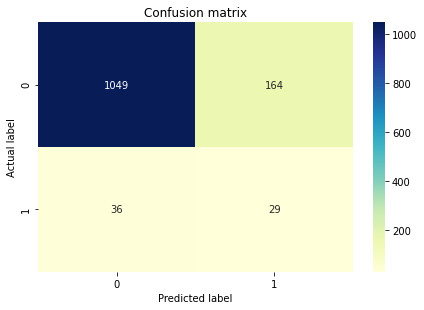

In [229]:
# Try Random Forest classifier  (ensemble classifier) with the full set of features

from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier(n_estimators=100, random_state=11)
model = rf_cl.fit(X_train_SMOTE, y_train_SMOTE)
rf_pred= model.predict(X_test)
accuracy = float(np.sum(rf_pred==y_test))/y_test.shape[0]
print("Accuracy: %.4f" % (accuracy))

importance = model.feature_importances_
for i,v in enumerate(importance):
  print('{:<10}{:<20}{:<8}{:.5f}'.format('Feature:',X_columns[i],'Score:',v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

probas = model.predict_proba(X_test)

probs = probas[:,1]

print ('Log loss: ', log_loss(y_test,probs))

losses = [log_loss(y_test, [yy for x in range(len(y_test))]) for yy in y_pred]
print ('Model score based on losses: ', np.mean(losses))
#plt.plot(y_pred, losses)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()
auc = roc_auc_score(y_test, probs)
print ('AUC = ', auc)

print(classification_report(y_test, y_pred, target_names=['0','1']))

conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Accuracy: 0.9397
Feature:  age                 Score:  0.68356
Feature:  smoking_status      Score:  0.31644


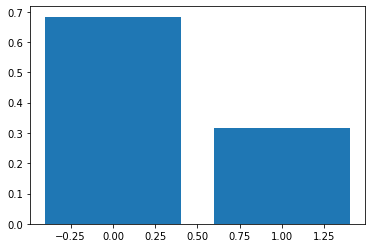

Log loss:  0.5543732095522345
Model score based on losses:  6.442157518987516


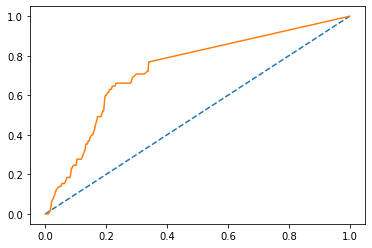

AUC =  0.7308389878876276
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1213
           1       0.15      0.45      0.22        65

    accuracy                           0.84      1278
   macro avg       0.56      0.66      0.57      1278
weighted avg       0.93      0.84      0.88      1278



Text(0.5, 15.0, 'Predicted label')

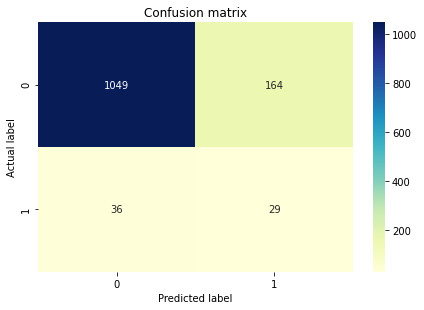

In [230]:
# Try a feature selection algorithm based on model fitness

from sklearn.feature_selection import SelectFromModel

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


X_train_fs, X_test_fs, fs = select_features(X_train_SMOTE, y_train_SMOTE, X_test)
rf_cl = RandomForestClassifier(n_estimators=100, random_state=11)
model = rf_cl.fit(X_train_fs, y_train_SMOTE)
rf_pred= model.predict(X_test_fs)
accuracy = float(np.sum(rf_pred==y_test))/y_test.shape[0]
print("Accuracy: %.4f" % (accuracy))

feature = X_columns[np.where(fs.get_support())[0]]   # recover the features selected
importance = model.feature_importances_
for i,v in enumerate(importance):
  print('{:<10}{:<20}{:<8}{:.5f}'.format('Feature:',feature[i],'Score:',v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

probas = model.predict_proba(X_test_fs)

probs = probas[:,1]

print ('Log loss: ', log_loss(y_test,probs))

losses = [log_loss(y_test, [yy for x in range(len(y_test))]) for yy in y_pred]
print ('Model score based on losses: ', np.mean(losses))
#plt.plot(y_pred, losses)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()
auc = roc_auc_score(y_test, probs)
print ('AUC = ', auc)

print(classification_report(y_test, y_pred, target_names=['0','1']))

conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 4d. XG Boost (Renee)

In [87]:
X_train_SMOTE = pd.DataFrame(X_train_SMOTE)      # XG Boost requires same column names for X_test, X_train 
X_test = pd.DataFrame(X_test)                    # convert ndarray to DataFrame to add column names 
X_train_SMOTE.columns = X_columns        # recover column names in X_train, dropped while doing sklearn functions
X_test.columns = X_columns               # recover column names in X_test
print (X_train_SMOTE.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')


Accuracy: 0.9374


<function matplotlib.pyplot.show>

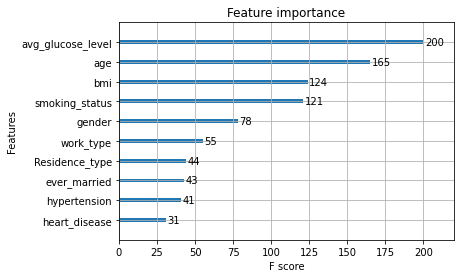

In [102]:
params={'learning_rate':0.4,
        'max_depth':7,
        'num_boost_round':2000,
        'objective': 'multi:softprob',
        'random_state': 7,
        'silent':0,
        'num_class':4,
        'eta':0.8
        }

model= xgb.train(params, xgb.DMatrix(X_train_SMOTE, y_train_SMOTE))
y_pred= model.predict(xgb.DMatrix(X_test))

model.save_model('testXGboostClass.model')

# return the index of the biggest probab
yprob= np.argmax(y_pred, axis=1)

predictions= [round(value) for value in yprob]

#evaluate predictions
accuracy= accuracy_score(y_test, predictions)
print("Accuracy: %.4f"% (accuracy))

plot_importance(model)
plt.show

## **5. Conclusion**
